### Municípios mais distantes dos estabelecimentos que mais fazem atendimento e os procedimentos que as pessoas desses municípios vão fazer lá

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hospitais = pd.read_csv("procedimentos.csv")
hosp = hospitais[~hospitais['NO_MUNICIPIO_RES'].isin(['SEM INFORMAÇÃO'])]
coordenadas = pd.read_csv("coordenadas.csv")

/home/mirian/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def separaData(data): 
  data = pd.to_datetime(data, format='%Y%m')
  data = data.strftime('%Y-%m')
  return data

def separaAno(data): 
  data = data.split('-')[0]
  return data

def separaMes(data): 
  data = data.split('-')[-1]
  return data

hosp['ANO_MES'] = hosp.apply(lambda row: separaData(row['ANO_MES']), axis=1)
hosp['ano'] = hosp.apply(lambda row: separaAno(row['ANO_MES']), axis=1)
hosp['mes'] = hosp.apply(lambda row: separaMes(row['ANO_MES']), axis=1)
hosp.head()

/home/mirian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/mirian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/mirian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,COD_MUNICIPIO,NO_MUNICIPIO,COD_MUNICIPIO_RES,NO_MUNICIPIO_RES,CNES,ESTABELECIMENTO,COD_PROCEDIMENTO,NO_PROCEDIMENTO,SEXO,COD_RACA,RACACOR,IDADE,Quantidade,Valor,ANO_MES,ano,mes
0,250010,AGUA BRANCA,240890,PARELHAS,2321777,UNIDADE DE SAUDE DA FAMILIA JOSE GOMES FILHO,301010110,CONSULTA PRE-NATAL,F,2,PRETA,29,1.0,0.0,2017-09,2017,09
1,250010,AGUA BRANCA,250010,AGUA BRANCA,2321742,UNIDADE DE SAUDE DA FAMILIA DE LAGOINHA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,1,BRANCA,3,1.0,0.0,2017-09,2017,09
2,250010,AGUA BRANCA,250010,AGUA BRANCA,2321742,UNIDADE DE SAUDE DA FAMILIA DE LAGOINHA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,1,BRANCA,15,1.0,0.0,2017-04,2017,04
3,250010,AGUA BRANCA,250010,AGUA BRANCA,2321742,UNIDADE DE SAUDE DA FAMILIA DE LAGOINHA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,1,BRANCA,15,1.0,0.0,2017-08,2017,08
4,250010,AGUA BRANCA,250010,AGUA BRANCA,2321742,UNIDADE DE SAUDE DA FAMILIA DE LAGOINHA,301010030,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,1,BRANCA,16,1.0,0.0,2017-04,2017,04


In [4]:
h = pd.merge(hosp, coordenadas, left_on="NO_MUNICIPIO_RES", right_on="name", how="left")

In [5]:
nans = h[h.isna().any(axis=1)]
nans.info()
#o merge causou NaNs porque a coluna name é composta apenas de municípios paraibanos, mas na coluna NO_MUNICIPIO_RES(municípios de origem dos pacientes) há municípios de outros estados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6806 entries, 0 to 1607019
Data columns (total 20 columns):
COD_MUNICIPIO        6806 non-null int64
NO_MUNICIPIO         6806 non-null object
COD_MUNICIPIO_RES    6806 non-null int64
NO_MUNICIPIO_RES     6806 non-null object
CNES                 6806 non-null int64
ESTABELECIMENTO      6806 non-null object
COD_PROCEDIMENTO     6806 non-null int64
NO_PROCEDIMENTO      6806 non-null object
SEXO                 6806 non-null object
COD_RACA             6806 non-null int64
RACACOR              6806 non-null object
IDADE                6806 non-null int64
Quantidade           6806 non-null float64
Valor                6806 non-null float64
ANO_MES              6806 non-null object
ano                  6806 non-null object
mes                  6806 non-null object
latitude             0 non-null float64
longitude            0 non-null float64
name                 0 non-null object
dtypes: float64(4), int64(6), object(10)
memory usage: 1.1+ M

In [6]:
#municípios de outros estados
h.NO_MUNICIPIO_RES.unique()

array(['PARELHAS', 'AGUA BRANCA', 'CATOLE DO ROCHA', 'IMACULADA',
       'JOAO PESSOA', 'JURU', "MAE D'AGUA", 'MAMANGUAPE', 'PATOS',
       'SALGADO DE SAO FELIX', 'TAVARES', 'AFOGADOS DA INGAZEIRA',
       'JABOATAO DOS GUARARAPES', 'PAULISTA', 'SANTA CRUZ DA BAIXA VERDE',
       'SANTA TEREZINHA', 'SOLIDAO', 'TABIRA', 'MACEIO', 'IRECE', 'UNA',
       'RIO DE JANEIRO', 'BARUERI', 'CARAPICUIBA', 'DIADEMA',
       'HORTOLANDIA', 'IBIRA', 'ITAQUAQUECETUBA', 'ITATIBA', 'JAGUARIUNA',
       'JANDIRA', 'JUNDIAI', 'JUQUITIBA', 'MAIRINQUE', 'MATAO', 'MAUA',
       'OSASCO', 'SANTA FE DO SUL', 'SANTO ANDRE', 'SAO PAULO',
       'SOROCABA', 'INDAIAL', 'TANGARA DA SERRA', 'AGUIAR', 'IGARACY',
       'ALAGOA GRANDE', 'BREJO DOS SANTOS', 'ALAGOA NOVA', 'ALAGOINHA',
       'ALCANTIL', 'AROEIRAS', 'BOQUEIRAO', 'LAGOA SECA',
       'RIACHO DE SANTO ANTONIO', 'SANTA CECILIA', 'GENTIO DO OURO',
       'ALHANDRA', 'BAYEUX', 'CAAPORA', 'CACIMBA DE DENTRO', 'CONDE',
       'INGA', 'PEDRAS DE FOGO', 'PITIM

In [7]:
#estabelecimentos que mais atendem
h['qtd_atendimentos'] = h.groupby(['ESTABELECIMENTO'])['NO_PROCEDIMENTO'].transform('count')
mais_atend = h.sort_values(by='qtd_atendimentos', ascending=False)
ma_at = mais_atend[['ESTABELECIMENTO','qtd_atendimentos','NO_MUNICIPIO']]
ma = ma_at.drop_duplicates()[:10]
ma

,ESTABELECIMENTO,qtd_atendimentos,NO_MUNICIPIO
1004962,FUNAD,128496,JOAO PESSOA
1158005,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,90731,JOAO PESSOA
934563,UPA CRUZ DAS ARMAS,71607,JOAO PESSOA
96734,UPA 24H UNIDADE DE PRONTO ATENDIMENTO BAYEUX,68154,BAYEUX
382360,CAIS JAGUARIBE,62251,JOAO PESSOA
1240820,HOSPITAL GERAL DE MAMANGUAPE,55142,MAMANGUAPE
906741,UNIDADE DE PRONTO ATENDIMENTO CELIO PIRES DE SA,55119,JOAO PESSOA
691951,HOSPITAL SAO VICENTE DE PAULO,51881,JOAO PESSOA
635902,MATERNIDADE CANDIDA VARGAS,48905,JOAO PESSOA
1381750,UPA UNIDADE DE PRONTO ATENDIMENTO DE POMBAL,44584,POMBAL


In [8]:
majp = mais_atend[mais_atend['ESTABELECIMENTO'].str.contains("FUNAD|COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMENTINO FRAGA|UPA CRUZ DAS ARMAS|CAIS JAGUARIBE|UNIDADE DE PRONTO ATENDIMENTO CELIO PIRES DE SA|HOSPITAL SAO VICENTE DE PAULO|MATERNIDADE CANDIDA VARGAS")]
majp.head()
#508990 procedimentos realizados somando os estabelecimentos de joão pessoa do top 10 estabelecimentos que mais atendem

,COD_MUNICIPIO,NO_MUNICIPIO,COD_MUNICIPIO_RES,NO_MUNICIPIO_RES,CNES,ESTABELECIMENTO,COD_PROCEDIMENTO,NO_PROCEDIMENTO,SEXO,COD_RACA,...,IDADE,Quantidade,Valor,ANO_MES,ano,mes,latitude,longitude,name,qtd_atendimentos
1004962,250750,JOAO PESSOA,250890,MAMANGUAPE,2343479,FUNAD,301070164,ATENDIMENTO/ACOMPANHAMENTO EM REABILITAÇÃO VISUAL,M,3,...,55,3.0,36.00,2017-09,2017,09,-6.833698,-35.121316,MAMANGUAPE,128496
412335,250750,JOAO PESSOA,250403,CAPIM,2343479,FUNAD,301070067,ATENDIMENTO / ACOMPANHAMENTO EM REABILITAÇÃO N...,F,3,...,21,1.0,6.49,2017-03,2017,03,-6.917409,-35.172033,CAPIM,128496
412341,250750,JOAO PESSOA,250403,CAPIM,2343479,FUNAD,301070067,ATENDIMENTO / ACOMPANHAMENTO EM REABILITAÇÃO N...,F,3,...,21,2.0,15.42,2018-10,2018,10,-6.917409,-35.172033,CAPIM,128496
412340,250750,JOAO PESSOA,250403,CAPIM,2343479,FUNAD,301070067,ATENDIMENTO / ACOMPANHAMENTO EM REABILITAÇÃO N...,F,3,...,21,3.0,23.13,2018-09,2018,09,-6.917409,-35.172033,CAPIM,128496
412339,250750,JOAO PESSOA,250403,CAPIM,2343479,FUNAD,301070067,ATENDIMENTO / ACOMPANHAMENTO EM REABILITAÇÃO N...,F,3,...,21,1.0,7.71,2018-08,2018,08,-6.917409,-35.172033,CAPIM,128496


In [9]:
naopb = majp[majp.isna().any(axis=1)]
naopb.info()
#dos 508990, 2836 procedimentos realizados não são de pacientes paraibanos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2836 entries, 1167707 to 292600
Data columns (total 21 columns):
COD_MUNICIPIO        2836 non-null int64
NO_MUNICIPIO         2836 non-null object
COD_MUNICIPIO_RES    2836 non-null int64
NO_MUNICIPIO_RES     2836 non-null object
CNES                 2836 non-null int64
ESTABELECIMENTO      2836 non-null object
COD_PROCEDIMENTO     2836 non-null int64
NO_PROCEDIMENTO      2836 non-null object
SEXO                 2836 non-null object
COD_RACA             2836 non-null int64
RACACOR              2836 non-null object
IDADE                2836 non-null int64
Quantidade           2836 non-null float64
Valor                2836 non-null float64
ANO_MES              2836 non-null object
ano                  2836 non-null object
mes                  2836 non-null object
latitude             0 non-null float64
longitude            0 non-null float64
name                 0 non-null object
qtd_atendimentos     2836 non-null int64
dtypes: float64

Text(0.5, 0.97, 'Municípios de pacientes não paraibanos com maior ocorrência de procedimentos entre 2017 e 2019 na Paraíba')

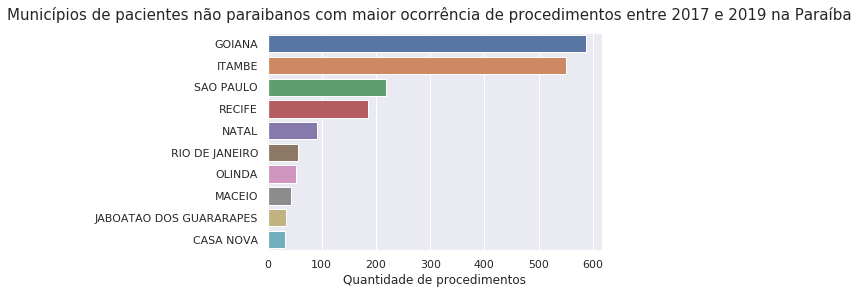

In [10]:
npb = naopb.NO_MUNICIPIO_RES.value_counts().to_frame().reset_index().rename(columns={'index':'mun_outro_estado','NO_MUNICIPIO_RES':'qtd_procedimentos'})[:10]
sns.set()
ax = sns.barplot(y="mun_outro_estado", x="qtd_procedimentos", data=npb, ci=None)
figure = ax.get_figure() 
ax.set_ylabel('')    
ax.set_xlabel('Quantidade de procedimentos')
figure.suptitle('Municípios de pacientes não paraibanos com maior ocorrência de procedimentos entre 2017 e 2019 na Paraíba', y=0.97, fontsize=15)

Text(0.5, 0.97, 'Procedimentos mais realizados por pacientes não paraibanos entre 2017 e 2019 na Paraíba')

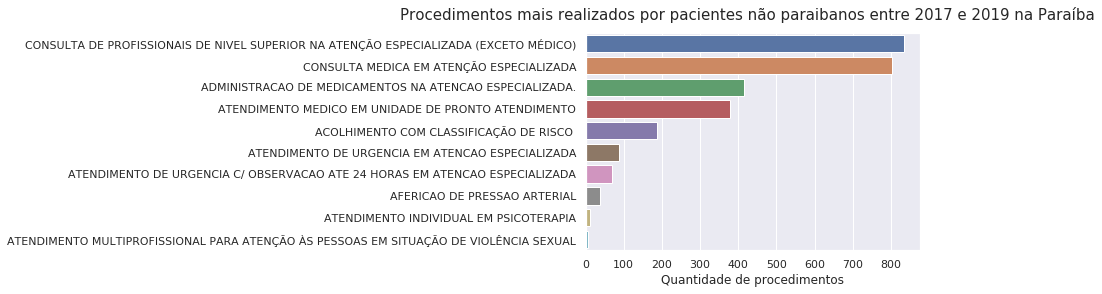

In [11]:
npb_proc = naopb.NO_PROCEDIMENTO.value_counts().to_frame().reset_index().rename(columns={'index':'procedimento','NO_PROCEDIMENTO':'qtd_procedimentos'})[:10]
sns.set()
ax = sns.barplot(y="procedimento", x="qtd_procedimentos", data=npb_proc, ci=None)
figure = ax.get_figure() 
ax.set_ylabel('')    
ax.set_xlabel('Quantidade de procedimentos') 
figure.suptitle('Procedimentos mais realizados por pacientes não paraibanos entre 2017 e 2019 na Paraíba', y=0.97, fontsize=15)

In [12]:
md = majp.dropna()
#não paraibanos excluídos (dá erro no geopy se houver NaN)

In [13]:
from geopy import distance

def distance_jp(row):
    start = (row['latitude'], row['longitude'])
    stop = -7.121598,-34.882028

    return distance.distance(start, stop).km

md['distance'] = md.apply (lambda row: distance_jp(row),axis=1)
md

/home/mirian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,COD_MUNICIPIO,NO_MUNICIPIO,COD_MUNICIPIO_RES,NO_MUNICIPIO_RES,CNES,ESTABELECIMENTO,COD_PROCEDIMENTO,NO_PROCEDIMENTO,SEXO,COD_RACA,...,Quantidade,Valor,ANO_MES,ano,mes,latitude,longitude,name,qtd_atendimentos,distance
1004962,250750,JOAO PESSOA,250890,MAMANGUAPE,2343479,FUNAD,301070164,ATENDIMENTO/ACOMPANHAMENTO EM REABILITAÇÃO VISUAL,M,3,...,3.0,36.00,2017-09,2017,09,-6.833698,-35.121316,MAMANGUAPE,128496,41.386874
412335,250750,JOAO PESSOA,250403,CAPIM,2343479,FUNAD,301070067,ATENDIMENTO / ACOMPANHAMENTO EM REABILITAÇÃO N...,F,3,...,1.0,6.49,2017-03,2017,03,-6.917409,-35.172033,CAPIM,128496,39.200257
412341,250750,JOAO PESSOA,250403,CAPIM,2343479,FUNAD,301070067,ATENDIMENTO / ACOMPANHAMENTO EM REABILITAÇÃO N...,F,3,...,2.0,15.42,2018-10,2018,10,-6.917409,-35.172033,CAPIM,128496,39.200257
412340,250750,JOAO PESSOA,250403,CAPIM,2343479,FUNAD,301070067,ATENDIMENTO / ACOMPANHAMENTO EM REABILITAÇÃO N...,F,3,...,3.0,23.13,2018-09,2018,09,-6.917409,-35.172033,CAPIM,128496,39.200257
412339,250750,JOAO PESSOA,250403,CAPIM,2343479,FUNAD,301070067,ATENDIMENTO / ACOMPANHAMENTO EM REABILITAÇÃO N...,F,3,...,1.0,7.71,2018-08,2018,08,-6.917409,-35.172033,CAPIM,128496,39.200257
412338,250750,JOAO PESSOA,250403,CAPIM,2343479,FUNAD,301070067,ATENDIMENTO / ACOMPANHAMENTO EM REABILITAÇÃO N...,F,3,...,2.0,12.98,2017-06,2017,06,-6.917409,-35.172033,CAPIM,128496,39.200257
412337,250750,JOAO PESSOA,250403,CAPIM,2343479,FUNAD,301070067,ATENDIMENTO / ACOMPANHAMENTO EM REABILITAÇÃO N...,F,3,...,4.0,25.96,2017-05,2017,05,-6.917409,-35.172033,CAPIM,128496,39.200257
412336,250750,JOAO PESSOA,250403,CAPIM,2343479,FUNAD,301070067,ATENDIMENTO / ACOMPANHAMENTO EM REABILITAÇÃO N...,F,3,...,2.0,12.98,2017-04,2017,04,-6.917409,-35.172033,CAPIM,128496,39.200257
412334,250750,JOAO PESSOA,250403,CAPIM,2343479,FUNAD,301070067,ATENDIMENTO / ACOMPANHAMENTO EM REABILITAÇÃO N...,F,3,...,1.0,7.71,2018-12,2018,12,-6.917409,-35.172033,CAPIM,128496,39.200257
412343,250750,JOAO PESSOA,250403,CAPIM,2343479,FUNAD,301070067,ATENDIMENTO / ACOMPANHAMENTO EM REABILITAÇÃO N...,F,3,...,1.0,7.71,2019-05,2019,05,-6.917409,-35.172033,CAPIM,128496,39.200257


In [14]:
#pesssoas q vieram de mais longe, pra onde foram, o q foram fazer, sexo delas, ano/mes
pessoas = md[['name','distance','NO_MUNICIPIO','ESTABELECIMENTO','NO_PROCEDIMENTO','SEXO','ano','mes','Quantidade']]
p = pessoas.sort_values(by='distance', ascending=False)
p

,name,distance,NO_MUNICIPIO,ESTABELECIMENTO,NO_PROCEDIMENTO,SEXO,ano,mes,Quantidade
1036035,PEDRA BRANCA,565.611708,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,M,2018,08,1.0
1036099,PEDRA BRANCA,565.611708,JOAO PESSOA,HOSPITAL SAO VICENTE DE PAULO,ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA,F,2017,03,2.0
1036095,PEDRA BRANCA,565.611708,JOAO PESSOA,HOSPITAL SAO VICENTE DE PAULO,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,F,2018,12,1.0
1036033,PEDRA BRANCA,565.611708,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,M,2018,04,1.0
1036032,PEDRA BRANCA,565.611708,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,M,2017,08,2.0
1036097,PEDRA BRANCA,565.611708,JOAO PESSOA,HOSPITAL SAO VICENTE DE PAULO,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,M,2019,03,1.0
1036108,PEDRA BRANCA,565.611708,JOAO PESSOA,HOSPITAL SAO VICENTE DE PAULO,ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA,F,2018,05,1.0
1036098,PEDRA BRANCA,565.611708,JOAO PESSOA,HOSPITAL SAO VICENTE DE PAULO,ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA,F,2017,02,2.0
1036031,PEDRA BRANCA,565.611708,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,M,2018,12,1.0
1036030,PEDRA BRANCA,565.611708,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,M,2018,05,1.0


In [15]:
#top10 municípios mais distantes de jp
p[['name', 'distance']].drop_duplicates()[:10]

,name,distance
1036035,PEDRA BRANCA,565.611708
401011,CACHOEIRA DOS INDIOS,419.554537
372336,BOM JESUS,418.312292
1081783,SANTA HELENA,417.666300
1165226,TRIUNFO,414.972700
372002,BERNARDINO BATISTA,412.103145
1081849,SANTA INES,409.808825
1027630,MONTE HOREBE,409.223638
1060620,POCO DANTAS,407.356368
403598,CAJAZEIRAS,406.873368


In [16]:
top10longe = p[p['name'].isin(['PEDRA BRANCA','CACHOEIRA DOS INDIOS','BOM JESUS','SANTA HELENA','TRIUNFO','BERNARDINO BATISTA','SANTA INES','MONTE HOREBE','POCO DANTAS','CAJAZEIRAS'])]
top10longe

,name,distance,NO_MUNICIPIO,ESTABELECIMENTO,NO_PROCEDIMENTO,SEXO,ano,mes,Quantidade
1036035,PEDRA BRANCA,565.611708,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,M,2018,08,1.0
1036099,PEDRA BRANCA,565.611708,JOAO PESSOA,HOSPITAL SAO VICENTE DE PAULO,ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA,F,2017,03,2.0
1036095,PEDRA BRANCA,565.611708,JOAO PESSOA,HOSPITAL SAO VICENTE DE PAULO,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,F,2018,12,1.0
1036033,PEDRA BRANCA,565.611708,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,M,2018,04,1.0
1036032,PEDRA BRANCA,565.611708,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,M,2017,08,2.0
1036097,PEDRA BRANCA,565.611708,JOAO PESSOA,HOSPITAL SAO VICENTE DE PAULO,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,M,2019,03,1.0
1036108,PEDRA BRANCA,565.611708,JOAO PESSOA,HOSPITAL SAO VICENTE DE PAULO,ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA,F,2018,05,1.0
1036098,PEDRA BRANCA,565.611708,JOAO PESSOA,HOSPITAL SAO VICENTE DE PAULO,ATENDIMENTO DE URGENCIA EM ATENCAO ESPECIALIZADA,F,2017,02,2.0
1036031,PEDRA BRANCA,565.611708,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,M,2018,12,1.0
1036030,PEDRA BRANCA,565.611708,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,M,2018,05,1.0


In [66]:
top10longe.SEXO.value_counts()

F    1643
M    1085
Name: SEXO, dtype: int64

Text(0.5, 1, 'Quantidade de procedimentos realizados por pacientes dos \n municípios paraibanos mais distantes de João Pessoa entre 2017 e 2019')

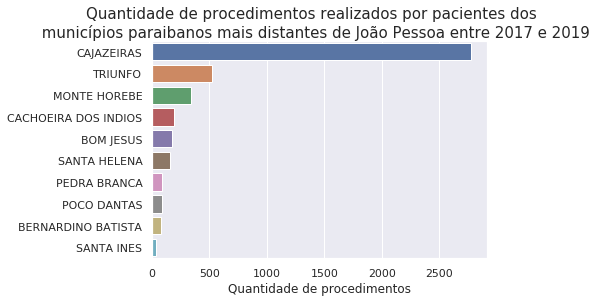

In [87]:
top10longe_proc = top10longe.groupby('name')['Quantidade'].sum().sort_values(ascending=False).to_frame().reset_index().rename(columns={'name':'mun_longe','Quantidade':'qtd_proc'})
top10longe_proc.qtd_proc = top10longe_proc.qtd_proc.astype(int)
sns.set()
ax = sns.barplot(x="qtd_proc", y="mun_longe", data=top10longe_proc, ci=None)
figure = ax.get_figure() 
ax.set_ylabel('')    
ax.set_xlabel('Quantidade de procedimentos') 
figure.suptitle('Quantidade de procedimentos realizados por pacientes dos \n municípios paraibanos mais distantes de João Pessoa entre 2017 e 2019', y=1, fontsize=15)

Text(0.5, 1, 'Top 10 de procedimentos realizados por pacientes \n dos municípios paraibanos mais distantes de João Pessoa entre 2017 e 2019')

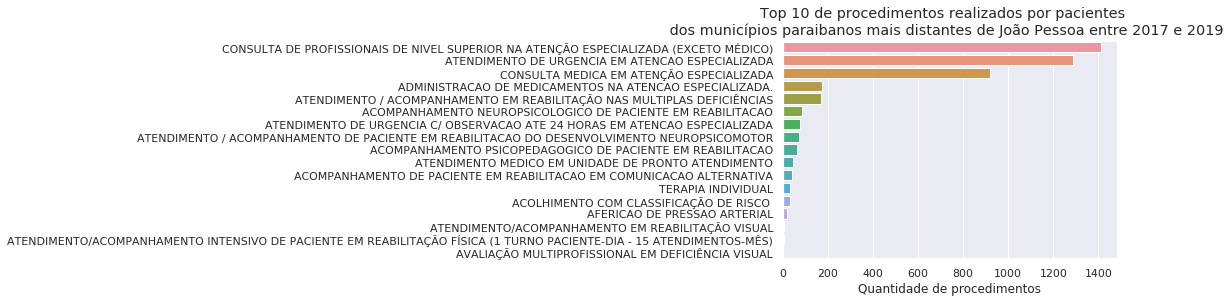

In [91]:
top10longe_procedimentos = top10longe.groupby('NO_PROCEDIMENTO')['Quantidade'].sum().sort_values(ascending=False).to_frame().reset_index().rename(columns={'NO_PROCEDIMENTO':'procedimento','Quantidade':'qtd_proc'})
sns.set()
ax = sns.barplot(y="procedimento", x="qtd_proc", data=top10longe_procedimentos, ci=None)
figure = ax.get_figure() 
ax.set_ylabel('')    
ax.set_xlabel('Quantidade de procedimentos') 
figure.suptitle('Top 10 de procedimentos realizados por pacientes \n dos municípios paraibanos mais distantes de João Pessoa entre 2017 e 2019', y=1)

In [19]:
cajazeiras = top10longe[top10longe['name'].isin(['CAJAZEIRAS'])]
cajazeiras              

,name,distance,NO_MUNICIPIO,ESTABELECIMENTO,NO_PROCEDIMENTO,SEXO,ano,mes,Quantidade
403598,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2017,05,1.0
403609,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2018,11,1.0
403608,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2017,10,1.0
403607,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2017,10,1.0
403601,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2018,11,1.0
403600,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2018,09,2.0
403606,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2017,08,1.0
403599,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2018,08,2.0
403605,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2017,11,1.0
403617,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2019,05,2.0


Text(0.5, 0.98, 'Top 10 dos procedimentos de pacientes \n de Cajazeiras em João Pessoa entre 2017 e 2019')

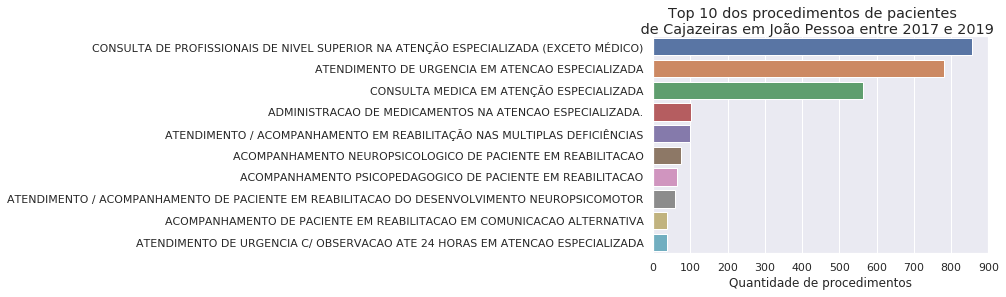

In [92]:
caj_proc = cajazeiras.groupby('NO_PROCEDIMENTO')['Quantidade'].sum().sort_values(ascending=False).to_frame().reset_index().rename(columns={'NO_PROCEDIMENTO':'procedimento','Quantidade':'qtd_proc'})[:10]
caj_proc.qtd_proc = caj_proc.qtd_proc.astype(int)
sns.set()
ax = sns.barplot(y="procedimento", x="qtd_proc", data=caj_proc, ci=None)
figure = ax.get_figure() 
ax.set_ylabel('')    
ax.set_xlabel('Quantidade de procedimentos') 
figure.suptitle('Top 10 dos procedimentos de pacientes \n de Cajazeiras em João Pessoa entre 2017 e 2019')

Text(0.5, 1, 'Quantidade de procedimentos realizados \n nos pacientes de Cajazeiras em João Pessoa entre 2017 e 2019')

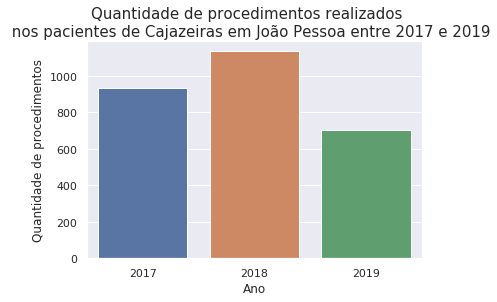

In [93]:
caj_ano = cajazeiras.groupby('ano')['Quantidade'].sum().sort_values(ascending=False).to_frame().reset_index().rename(columns={'NO_PROCEDIMENTO':'procedimento','Quantidade':'qtd_proc'})
sns.set()
ax = sns.barplot(x="ano", y="qtd_proc", data=caj_ano, ci=None)
figure = ax.get_figure() 
ax.set_xlabel('Ano')    
ax.set_ylabel('Quantidade de procedimentos') 
figure.suptitle('Quantidade de procedimentos realizados \n nos pacientes de Cajazeiras em João Pessoa entre 2017 e 2019', y=1, fontsize=15)

In [21]:
caj18 = cajazeiras.groupby(cajazeiras['ano']).get_group('2018')
caj18

,name,distance,NO_MUNICIPIO,ESTABELECIMENTO,NO_PROCEDIMENTO,SEXO,ano,mes,Quantidade
403609,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2018,11,1.0
403601,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2018,11,1.0
403600,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2018,09,2.0
403599,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2018,08,2.0
403921,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA MEDICA EM ATENÇÃO ESPECIALIZADA,F,2018,07,1.0
403945,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA MEDICA EM ATENÇÃO ESPECIALIZADA,M,2018,10,1.0
403626,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2018,06,1.0
403575,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2018,04,4.0
403944,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA MEDICA EM ATENÇÃO ESPECIALIZADA,M,2018,04,1.0
403644,CAJAZEIRAS,406.873368,JOAO PESSOA,COMPLEXO DE DOENCAS INFECTO CONTAGIOSAS CLEMEN...,CONSULTA DE PROFISSIONAIS DE NIVEL SUPERIOR NA...,F,2018,09,1.0


Text(0.5, 0.95, 'Top 10 dos procedimentos de pacientes de Cajazeiras em João Pessoa em 2018')

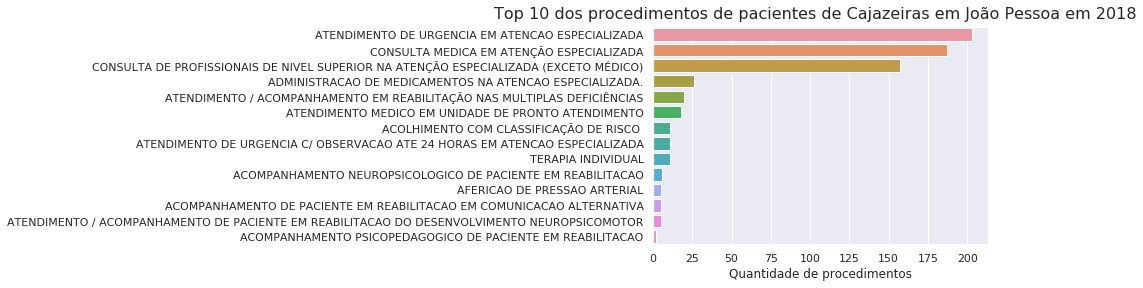

In [86]:
caj18_proc = caj18.NO_PROCEDIMENTO.value_counts().to_frame().reset_index().rename(columns={'index':'procedimento','NO_PROCEDIMENTO':'qtd_procedimentos'})
sns.set()
ax = sns.barplot(y="procedimento", x="qtd_procedimentos", data=caj18_proc, ci=None)
figure = ax.get_figure() 
ax.set_ylabel('')    
ax.set_xlabel('Quantidade de procedimentos') 
figure.suptitle('Top 10 dos procedimentos de pacientes de Cajazeiras em João Pessoa em 2018', y=0.95, fontsize=16)